In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("output/caratPrice.csv")
df.head()

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039


### Model 1 - Linear regression

In [13]:
model_1 = CmdStanModel(stan_file='model_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
fit_1 = model_1.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(fit_1.draws_pd())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -2683.38       0.831086    0.742313          2.0           3.0   
1    -2683.54       0.983667    0.742313          2.0           7.0   
2    -2680.92       1.000000    0.742313          2.0           3.0   
3    -2680.77       1.000000    0.742313          3.0           7.0   
4    -2682.02       0.927245    0.742313          2.0           3.0   
...       ...            ...         ...          ...           ...   
3995 -2680.37       0.982686    0.721697          3.0           7.0   
3996 -2680.66       0.893916    0.721697          3.0           7.0   
3997 -2681.18       0.968589    0.721697          2.0           3.0   
3998 -2680.17       1.000000    0.721697          2.0           3.0   
3999 -2681.03       0.911873    0.721697          2.0           3.0   

      divergent__  energy__    alpha     beta    sigma  ...  y_sim[264]  \
0             0.0   2684.92  249.577  5629.34  1360.23  ...     17196.0

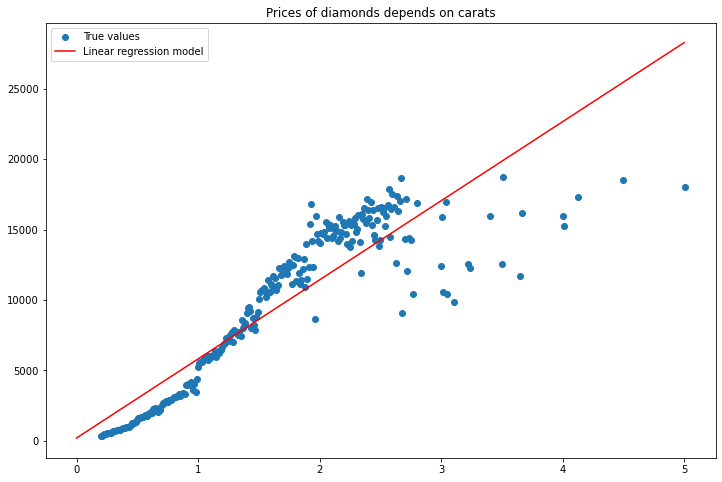

In [15]:
df_alpha = pd.DataFrame(fit_1.stan_variables()["alpha"])
df_beta = pd.DataFrame(fit_1.stan_variables()["beta"])
df_sigma = pd.DataFrame(fit_1.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Linear regression model"])
plt.show()

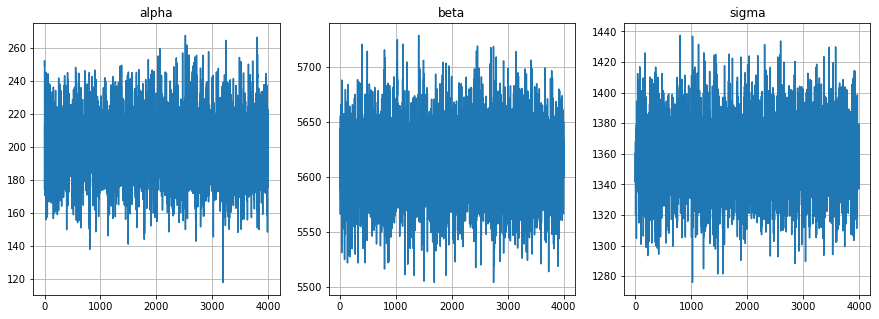

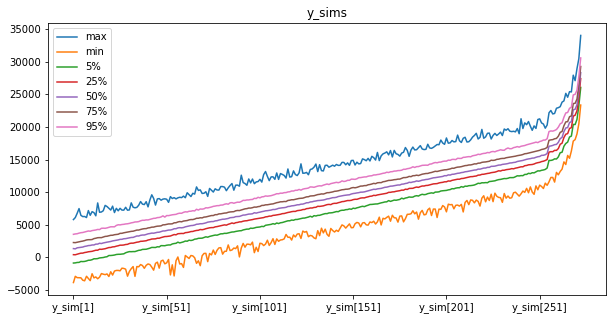

In [16]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axs[0].plot(df_alpha)
axs[0].grid()
axs[0].set_title('alpha')
axs[1].plot(df_beta)
axs[1].grid()
axs[1].set_title('beta')
axs[2].plot(df_sigma)
axs[2].grid()
axs[2].set_title('sigma')
plt.show()

data = fit_1.draws_pd()
y_sims = data[data.columns[10:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

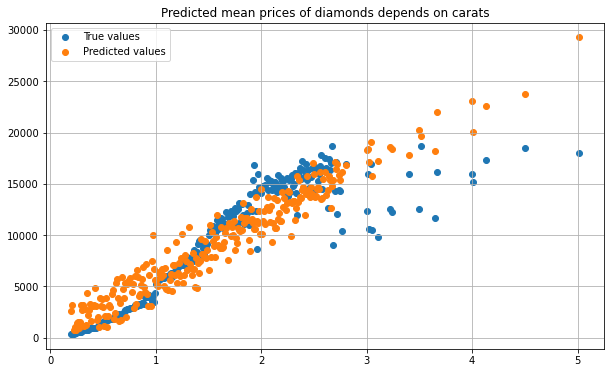

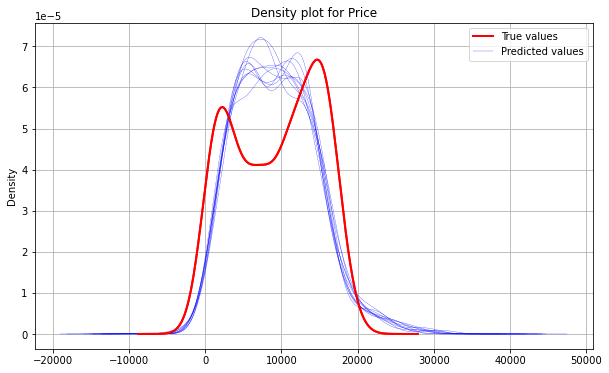

In [17]:
plt.figure(figsize=[10,6])
y_sims_mean = y_sims.mean().to_numpy()
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sims.iloc[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Model 2 - Polynomial regression

In [27]:
model_2 = CmdStanModel(stan_file='model_2.stan')

INFO:cmdstanpy:compiling stan file E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_2.stan to exe file E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_2.exe
INFO:cmdstanpy:compiled model executable: E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_2.exe


In [28]:
fit_2 = model_2.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(fit_2.draws_pd())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -3116.59       0.996752    0.038857          5.0          63.0   
1    -3119.77       0.914209    0.038857          5.0          31.0   
2    -3114.63       1.000000    0.038857          5.0          31.0   
3    -3114.23       0.998138    0.038857          5.0          31.0   
4    -3113.41       0.972177    0.038857          4.0          15.0   
...       ...            ...         ...          ...           ...   
3995 -3116.29       0.996037    0.030906          6.0          63.0   
3996 -3115.94       0.941107    0.030906          5.0          63.0   
3997 -3117.80       0.954230    0.030906          6.0          63.0   
3998 -3114.95       0.996573    0.030906          5.0          47.0   
3999 -3114.77       0.871776    0.030906          5.0          63.0   

      divergent__  energy__    alpha     beta    gamma  ...  y_sim[264]  \
0             0.0   3122.49  612.936 -4072.02  12976.2  ...     13807.4

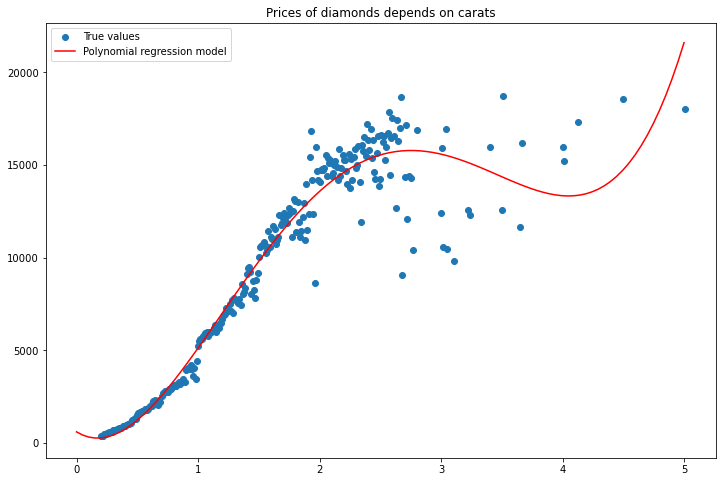

In [29]:
df_alpha = pd.DataFrame(fit_2.stan_variables()["alpha"])
df_beta = pd.DataFrame(fit_2.stan_variables()["beta"])
df_gamma = pd.DataFrame(fit_2.stan_variables()["gamma"])
df_delta = pd.DataFrame(fit_2.stan_variables()["delta"])
df_eps = pd.DataFrame(fit_2.stan_variables()["eps"])
df_sigma = pd.DataFrame(fit_2.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
gamma = df_gamma.mean().to_numpy()
delta = df_delta.mean().to_numpy()
eps = df_eps.mean().to_numpy()

sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x + gamma*(x**2) + delta*(x**3) + eps*(x**4)

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Polynomial regression model"])
plt.show()

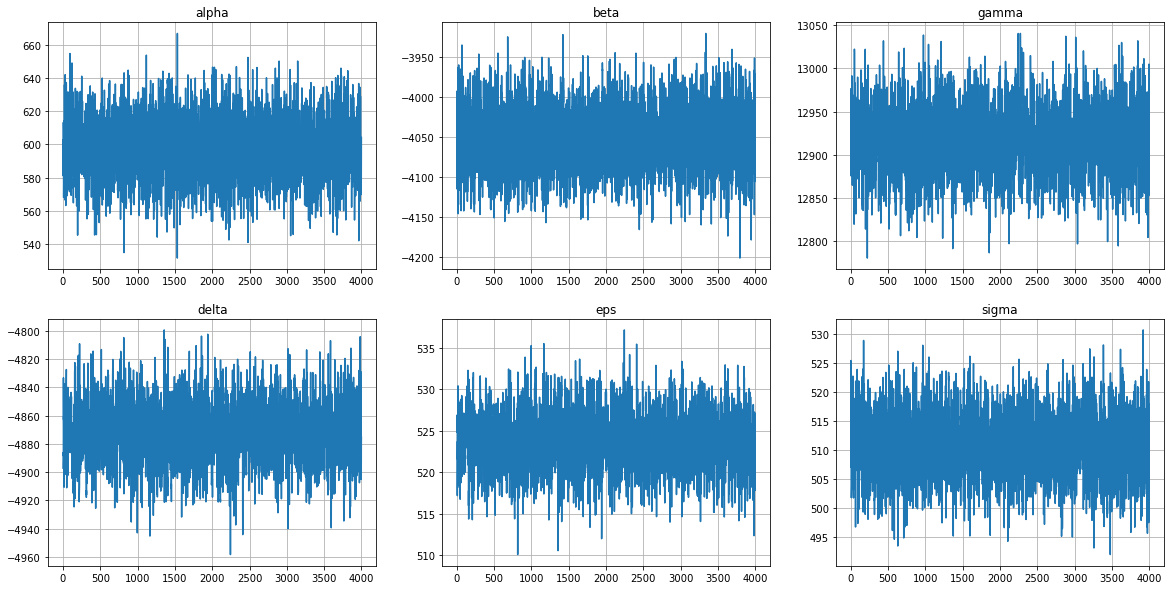

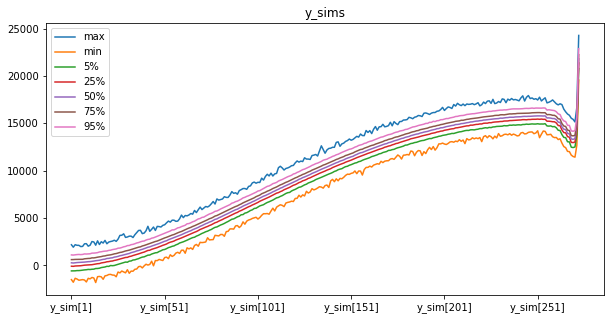

In [30]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(20, 10)
axs[0][0].plot(df_alpha)
axs[0][0].grid()
axs[0][0].set_title('alpha')
axs[0][1].plot(df_beta)
axs[0][1].grid()
axs[0][1].set_title('beta')
axs[0][2].plot(df_gamma)
axs[0][2].grid()
axs[0][2].set_title('gamma')
axs[1][0].plot(df_delta)
axs[1][0].grid()
axs[1][0].set_title('delta')
axs[1][1].plot(df_eps)
axs[1][1].grid()
axs[1][1].set_title('eps')
axs[1][2].plot(df_sigma)
axs[1][2].grid()
axs[1][2].set_title('sigma')
plt.show()

data = fit_2.draws_pd()
y_sims = data[data.columns[13:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

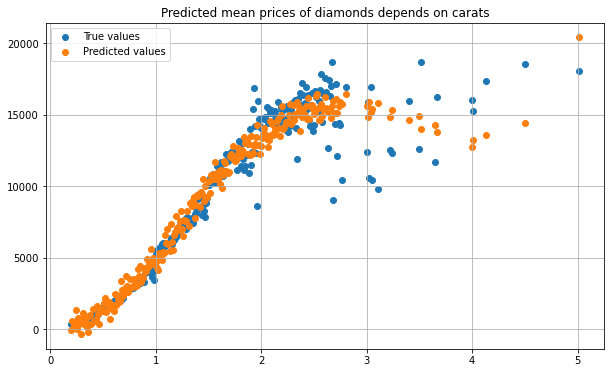

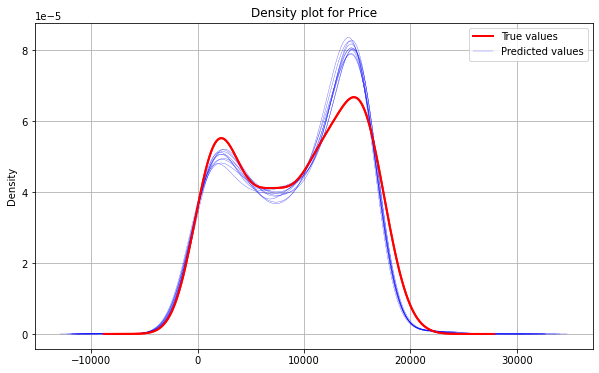

In [31]:
plt.figure(figsize=[10,6])
y_sims_mean = y_sims.mean().to_numpy()
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sims.iloc[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()